In [ ]:
# https://medium.com/themlblog/time-series-analysis-using-recurrent-neural-networks-in-tensorflow-2a0478b00be7

In [2]:
# -*- coding: utf-8 -*-

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

class TimeSeriesData():
    def __init__(self,num_points,xmin,xmax):
        self.xmin=xmin
        self.xmax=xmax
        self.num_points=num_points
        self.resolution=(xmax-xmin)/num_points
        self.x_data=np.linspace(xmin,xmax,num_points)
        self.y_true=np.sin(self.x_data)
        
    def ret_true(self,x_series):
        return np.sin(x_series)
    
    def next_batch(self,batch_size,steps,return_batch_ts=False):
        #Random starting point for batch
        random_start=np.random.rand(batch_size,1)
        
        #Put the random point on the time series
        ts_start=random_start*(self.xmax-self.xmin-(steps*self.resolution)) #Trick to convert any number into a point in the time series
        
        
        batch_ts=ts_start+np.arange(0.0,steps+1) * self.resolution #steps +1 because we are predicting just one tme step ahead
        
        y_batch=np.sin(batch_ts)
        
        #Formatting for RNN
        if return_batch_ts:
            return y_batch[:,:-1].reshape(-1,steps,1) , y_batch[:,1:].reshape(-1,steps,1), batch_ts
        else:
            return y_batch[:,:-1].reshape(-1,steps,1) , y_batch[:,1:].reshape(-1,steps,1) #Returning the sequence shifted over one time step
        
        
        
ts_data=TimeSeriesData(250,0,10)
plt.plot(ts_data.x_data,ts_data.y_true)
plt.show()

num_time_steps=30

y1,y2,ts= ts_data.next_batch(1,num_time_steps,True)

print(ts.flatten().shape)

plt.plot(ts.flatten()[1:],y1.flatten(),"*")
plt.show()

plt.plot(ts_data.x_data,ts_data.y_true)
plt.plot(ts.flatten()[1:],y1.flatten(),"g*")
plt.show()

train_inst=np.linspace(5,5+ts_data.resolution*(num_time_steps+1),num_time_steps+1)

#CREATE THE MODEL
#If using GPU, use the line below in case of any issues
tf.reset_default_graph()

num_inputs=1
num_neurons=100
num_outputs=1
learning_rate=0.001
num_iter=5000
batch_size=1

x=tf.placeholder(tf.float32,[None,num_time_steps,num_inputs])
y=tf.placeholder(tf.float32,[None,num_time_steps,num_outputs])

#ANY RNN CELL TYPE
cell=tf.contrib.rnn.OutputProjectionWrapper(tf.contrib.rnn.GRUCell(num_units=num_neurons,activation=tf.nn.relu),output_size=num_outputs)

outputs,states=tf.nn.dynamic_rnn(cell,x,dtype=tf.float32)

#MSE
loss=tf.reduce_mean(tf.square(outputs-y))
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate)

train=optimizer.minimize(loss)

init=tf.global_variables_initializer()


x_new=np.sin(np.array(train_inst[:-1].reshape(-1,num_time_steps,num_inputs)))

#If using GPU, specify the fraction oof memory to be consumed
#gpu_options=tf.GPUOptions(per_process_gpu_memory_fraction=0.75)
    
with tf.Session() as sess:
    sess.run(init)
    
    for iter in range(num_iter):
        x_batch , y_batch = ts_data.next_batch(batch_size,num_time_steps)
        
        sess.run(train,feed_dict={x:x_batch,y:y_batch})
        
        if iter %100==0:
        
            mse=loss.eval(feed_dict={x:x_batch,y:y_batch})
            print(iter, "\tMSE",mse)
            
        y_pred=sess.run(outputs,feed_dict={x:x_new})
    

plt.title("TESTING THE MODEL")

#TRAINING INSTANCE
plt.plot(train_inst[:-1],np.sin(train_inst[:-1]),"bo",markersize=15,alpha=0.5,label="TRAINING INST")

#TARGET TO PREDICT 
plt.plot(train_inst[1:],np.sin(train_inst[1:]),"ko",markersize=8,label="TARGET")

#MODEL PREDCTION
plt.plot(train_inst[1:],y_pred[0,:,0],"r.",markersize=7,label="PREDICTIONS")

plt.xlabel("TIME")
plt.legend()
plt.tight_layout()

plt.show()
    


/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


<Figure size 640x480 with 1 Axes>

(31,)


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

0 	MSE 0.5223706
100 	MSE 0.033915512
200 	MSE 0.012186553
300 	MSE 0.0035922083
400 	MSE 0.021715347
500 	MSE 0.00088384864
600 	MSE 0.0009953774
700 	MSE 0.002889492
800 	MSE 0.00051038305
900 	MSE 0.000698194
1000 	MSE 7.760606e-05
1100 	MSE 0.002965939
1200 	MSE 0.0026660082
1300 	MSE 0.00012859768
1400 	MSE 2.1305777e-05
1500 	MSE 3.7142367e-05
1600 	MSE 6.674914e-05
1700 	MSE 0.00017611428
1800 	MSE 0.00035182142
1900 	MSE 2.2296766e-05
2000 	MSE 0.001063524
2100 	MSE 0.00012127871
2200 	MSE 1.5401743e-05
2300 	MSE 3.340416e-05
2400 	MSE 8.480793e-05
2500 	MSE 1.8884846e-05
2600 	MSE 1.4515023e-05
2700 	MSE 5.1834402e-05
2800 	MSE 3.3235254e-05
2900 	MSE 8.1481536e-05
3000 	MSE 7.612047e-05
3100 	MSE 0.00030185198
3200 	MSE 1.1632189e-05
3300 	MSE 4.3074142e-05
3400 	MSE 2.3082295e-05
3500 	MSE 2.1321775e-05
3600 	MSE 8.966538e-05
3700 	MSE 2.7884738e-05
3800 	MSE 2.8238102e-05
3900 	MSE 9.328385e-06
4000 	MSE 2.435035e-05
4100 	MSE 3.5046618e-05
4200 	MSE 0.002277685
4300 	MSE 0

<Figure size 640x480 with 1 Axes>

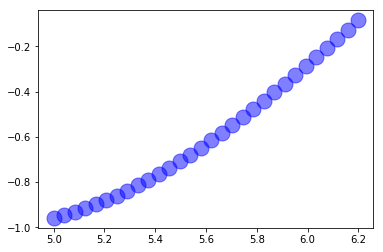

In [2]:
#TRAINING INSTANCE
plt.plot(train_inst[:-1],np.sin(train_inst[:-1]),"bo",markersize=15,alpha=0.5,label="TRAINING INST")

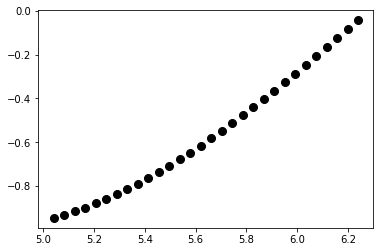

In [3]:
#TARGET TO PREDICT 
plt.plot(train_inst[1:],np.sin(train_inst[1:]),"ko",markersize=8,label="TARGET")

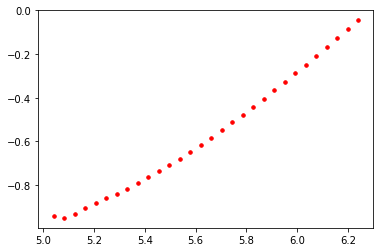

In [4]:
#MODEL PREDCTION
plt.plot(train_inst[1:],y_pred[0,:,0],"r.",markersize=7,label="PREDICTIONS")

In [1]:
ts_data=TimeSeriesData(250,0,10)
plt.plot(ts_data.x_data,ts_data.y_true)
plt.show()

NameError: name 'TimeSeriesData' is not defined